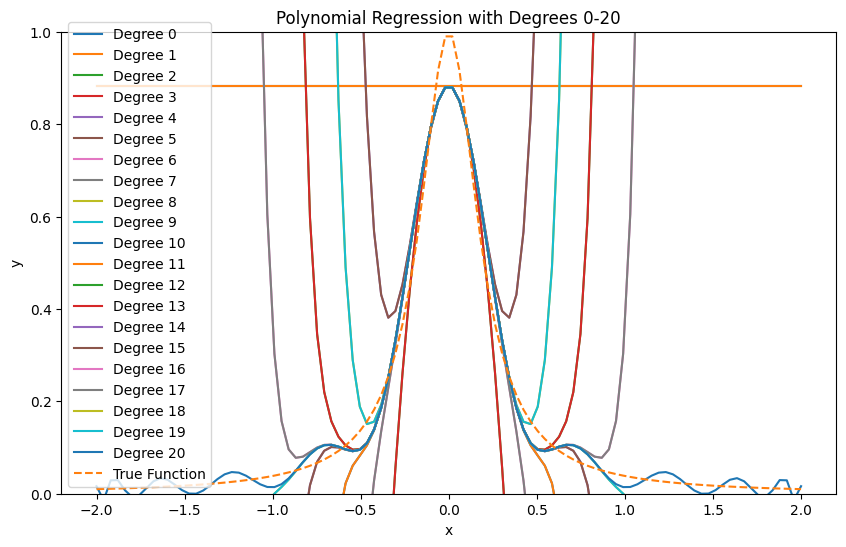

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Создаем функцию y(x)
def y(x):
    return 1 / (1 + 25 * x**2)

# 2. Генерируем данные
x = np.linspace(-2, 2, 100)
y_true = y(x)

# 3. Создаем матрицу A для полинома степени 20
n = 21  # Степень полинома + 1
A = np.vstack([x**i for i in range(n)]).T

# 4. Используем метод наименьших квадратов для нахождения коэффициентов
coefficients, residuals, _, _ = np.linalg.lstsq(A, y_true, rcond=None)

# 5. Визуализируем процесс обучения
plt.figure(figsize=(10, 6))
for i in range(n):
    y_pred = np.dot(A[:, :i+1], coefficients[:i+1])
    plt.plot(x, y_pred, label=f'Degree {i}')

plt.plot(x, y_true, label='True Function', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Degrees 0-20')
# Установка ограничения по оси y
plt.ylim(0, 1)
plt.show()


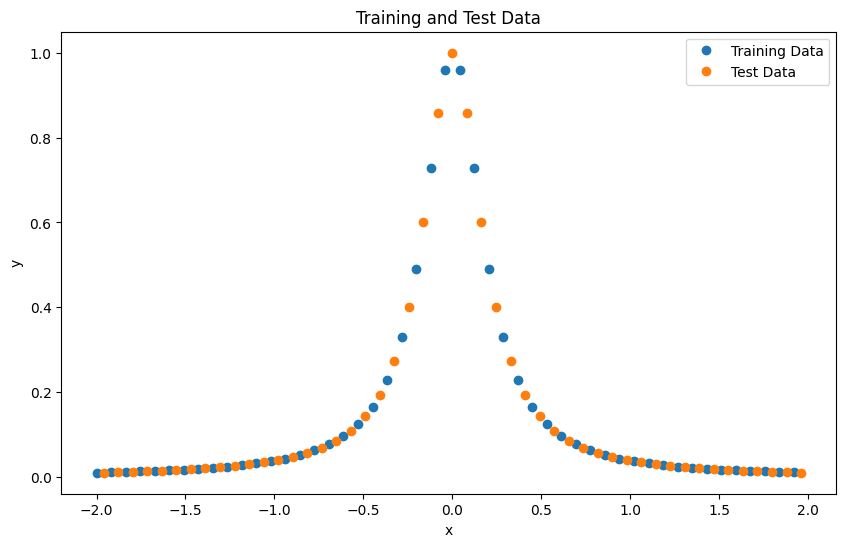

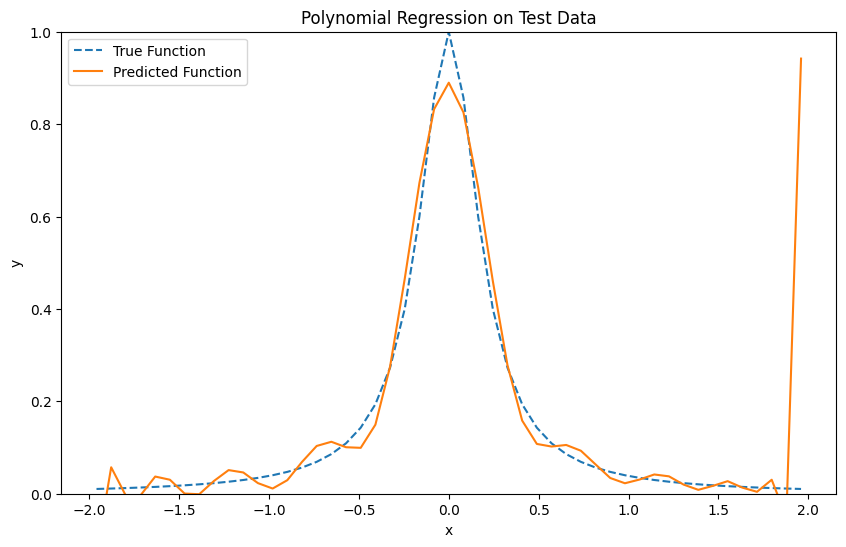

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем функцию y(x)
def y(x):
    return 1 / (1 + 25 * x**2)

# Генерируем обучающую выборку Sl
l = 50  # Количество точек в обучающей выборке
x_train = np.array([4 * (i - 1) / (l - 1) - 2 for i in range(1, l)])
y_train = y(x_train)

# Генерируем контрольную выборку Sk
k = 50  # Количество точек в контрольной выборке
x_test = np.array([4 * (i - 0.5) / (l - 1) - 2 for i in range(1, k)])
y_test = y(x_test)

# Создаем матрицу A для полинома степени 20 для обучающей выборки
n = 21  # Степень полинома + 1
A_train = np.vstack([x_train**i for i in range(n)]).T

# Используем метод наименьших квадратов для нахождения коэффициентов для обучающей выборки
coefficients, residuals, _, _ = np.linalg.lstsq(A_train, y_train, rcond=None)

# Создаем матрицу A для полинома степени 20 для контрольной выборки
A_test = np.vstack([x_test**i for i in range(n)]).T

# Прогнозируем значения для контрольной выборки
y_pred_test = np.dot(A_test, coefficients)

# Визуализируем обучающую и контрольную выборки
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label='Training Data', marker='o', linestyle='None')
plt.plot(x_test, y_test, label='Test Data', marker='o', linestyle='None')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()

# Визуализируем результат полиномиальной регрессии на контрольной выборке
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Function', linestyle='--')
plt.plot(x_test, y_pred_test, label='Predicted Function', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression on Test Data')
# Установка ограничения по оси y
plt.ylim(0, 1)
plt.legend()

plt.show()


In [18]:
from sklearn.metrics import mean_squared_error

# Вычисляем MSE на контрольной выборке
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

Mean Squared Error (MSE) on Test Data: 0.0192
